In [273]:
import pandas as pd
from scipy.stats import norm
import numpy as np
from datetime import date

In [274]:
data = pd.read_csv('quinzena.csv', sep=';')

In [275]:
data.head()

,Symbol,Position,Type,Lots,Open time,Open price,Close time,Close price,Profit,Net profit,Rollover,S/L,T/P,Commission,Swap,Margin
0,USDJPY,978567171,Sell Stop,0.02,31.05.2023 08:30:47,139.83500,31.05.2023 11:00:04,140.32000,-6.92,-6.92,0,140.08500,139.41400,0,0.0,10.00
1,OIL.WTI,972663062,Sell Stop,0.01,24.05.2023 11:00:05,74.15000,24.05.2023 11:36:51,74.68000,-5.30,-5.30,0,74.68000,73.30000,0,0.0,11.12
2,OIL.WTI,977810744,Buy Stop,0.01,30.05.2023 13:36:30,69.82000,30.05.2023 13:51:24,69.39000,-4.30,-4.30,0,69.41000,70.47000,0,0.0,10.47
3,EURUSD,973709556,Buy Stop,0.02,25.05.2023 07:29:13,1.07309,25.05.2023 10:39:03,1.07108,-4.02,-4.02,0,1.07108,1.07631,0,0.0,10.73
4,GBPUSD,974499588,Sell Stop,0.02,25.05.2023 15:36:47,1.23214,25.05.2023 18:07:23,1.23346,-2.64,-2.64,0,1.23339,1.23018,0,0.0,12.32


In [276]:
data.dtypes

Symbol          object
Position         int64
Type            object
Lots           float64
Open time       object
Open price     float64
Close time      object
Close price    float64
Profit         float64
Net profit     float64
Rollover         int64
S/L            float64
T/P            float64
Commission       int64
Swap           float64
Margin         float64
dtype: object

## Transformando Open time e Close time em datetime:

In [277]:
data['Open time'] = pd.to_datetime(data['Open time'])
data['Close time'] = pd.to_datetime(data['Close time'])

In [278]:
data.dtypes

Symbol                 object
Position                int64
Type                   object
Lots                  float64
Open time      datetime64[ns]
Open price            float64
Close time     datetime64[ns]
Close price           float64
Profit                float64
Net profit            float64
Rollover                int64
S/L                   float64
T/P                   float64
Commission              int64
Swap                  float64
Margin                float64
dtype: object

## Gerando a variável Tipo com base em Compra ou Venda:

In [279]:
data['Tipo'] = data['Type'].apply(lambda x: 'Compra' if x in 'Buy Stop' else 'Venda')
data.head()

,Symbol,Position,Type,Lots,Open time,Open price,Close time,Close price,Profit,Net profit,Rollover,S/L,T/P,Commission,Swap,Margin,Tipo
0,USDJPY,978567171,Sell Stop,0.02,2023-05-31 08:30:47,139.83500,2023-05-31 11:00:04,140.32000,-6.92,-6.92,0,140.08500,139.41400,0,0.0,10.00,Venda
1,OIL.WTI,972663062,Sell Stop,0.01,2023-05-24 11:00:05,74.15000,2023-05-24 11:36:51,74.68000,-5.30,-5.30,0,74.68000,73.30000,0,0.0,11.12,Venda
2,OIL.WTI,977810744,Buy Stop,0.01,2023-05-30 13:36:30,69.82000,2023-05-30 13:51:24,69.39000,-4.30,-4.30,0,69.41000,70.47000,0,0.0,10.47,Compra
3,EURUSD,973709556,Buy Stop,0.02,2023-05-25 07:29:13,1.07309,2023-05-25 10:39:03,1.07108,-4.02,-4.02,0,1.07108,1.07631,0,0.0,10.73,Compra
4,GBPUSD,974499588,Sell Stop,0.02,2023-05-25 15:36:47,1.23214,2023-05-25 18:07:23,1.23346,-2.64,-2.64,0,1.23339,1.23018,0,0.0,12.32,Venda


## Gerando a variável Tempo de duração por operação :

In [280]:
data['Tempo Op.'] = data['Close time'] - data['Open time']
data.head()

,Symbol,Position,Type,Lots,Open time,Open price,Close time,Close price,Profit,Net profit,Rollover,S/L,T/P,Commission,Swap,Margin,Tipo,Tempo Op.
0,USDJPY,978567171,Sell Stop,0.02,2023-05-31 08:30:47,139.83500,2023-05-31 11:00:04,140.32000,-6.92,-6.92,0,140.08500,139.41400,0,0.0,10.00,Venda,0 days 02:29:17
1,OIL.WTI,972663062,Sell Stop,0.01,2023-05-24 11:00:05,74.15000,2023-05-24 11:36:51,74.68000,-5.30,-5.30,0,74.68000,73.30000,0,0.0,11.12,Venda,0 days 00:36:46
2,OIL.WTI,977810744,Buy Stop,0.01,2023-05-30 13:36:30,69.82000,2023-05-30 13:51:24,69.39000,-4.30,-4.30,0,69.41000,70.47000,0,0.0,10.47,Compra,0 days 00:14:54
3,EURUSD,973709556,Buy Stop,0.02,2023-05-25 07:29:13,1.07309,2023-05-25 10:39:03,1.07108,-4.02,-4.02,0,1.07108,1.07631,0,0.0,10.73,Compra,0 days 03:09:50
4,GBPUSD,974499588,Sell Stop,0.02,2023-05-25 15:36:47,1.23214,2023-05-25 18:07:23,1.23346,-2.64,-2.64,0,1.23339,1.23018,0,0.0,12.32,Venda,0 days 02:30:36


## Removendo colunas:

In [281]:
data.drop(['Position',
           'Open price',
           'Open time',
           'Close price',
           'Close time',
           'Rollover',
           'Commission',
           'T/P',
           'S/L',
           'Type'],
          axis='columns', inplace=True)


In [282]:
data.head()

,Symbol,Lots,Profit,Net profit,Swap,Margin,Tipo,Tempo Op.
0,USDJPY,0.02,-6.92,-6.92,0.0,10.00,Venda,0 days 02:29:17
1,OIL.WTI,0.01,-5.30,-5.30,0.0,11.12,Venda,0 days 00:36:46
2,OIL.WTI,0.01,-4.30,-4.30,0.0,10.47,Compra,0 days 00:14:54
3,EURUSD,0.02,-4.02,-4.02,0.0,10.73,Compra,0 days 03:09:50
4,GBPUSD,0.02,-2.64,-2.64,0.0,12.32,Venda,0 days 02:30:36


## Alguns dados operacionais:

In [283]:
contador = lucro = prejuizo = 0

for c in data['Net profit']:
    if c >= 0:
        contador += 1
        lucro += c
    else:
        prejuizo -= c

vencedoras = (contador / len(data)) * 100
perdedoras = 100 - vencedoras

lista_qtd = [contador, len(data) - contador, len(data)]
lista_prop = [vencedoras, perdedoras, 100.00]
lista_lucro = [lucro, -prejuizo, lucro - prejuizo]

proporcao = pd.DataFrame(data = [lista_qtd, lista_prop, lista_lucro],
                         index = ['Qtd. Op.', 'Proporção (%)', 'Lucro (U$)'],
                         columns = ['Op. Vencedoras', 'Op. Perdedoras', 'Total']).T

proporcao['Proporção (%)'] = proporcao['Proporção (%)'].round(2)
proporcao['Lucro (U$)'] = proporcao['Lucro (U$)'].round(2)
proporcao = proporcao.astype({"Qtd. Op.": int})
proporcao

,Qtd. Op.,Proporção (%),Lucro (U$)
Op. Vencedoras,22,64.71,59.6
Op. Perdedoras,12,35.29,-32.8
Total,34,100.00,26.8


## Frequência de resultado de acordo com o tipo de ordem (Compra/Venda) por símbolo:

In [292]:
freq_simbolo = pd.crosstab(data.Symbol, data.Tipo,
               values=data['Net profit'],
               aggfunc={'sum'})
freq_simbolo.fillna(0, inplace=True)
freq_simbolo.columns = freq_simbolo.columns.droplevel(0)
freq_simbolo['Resultado (U$)'] = freq_simbolo.Compra + freq_simbolo.Venda
freq_simbolo['PayOff'] = (freq_simbolo.Compra / freq_simbolo.Venda).round(2)
freq_simbolo

Tipo,Compra,Venda,Resultado (U$),PayOff
Symbol,,,,
EURUSD,-4.52,8.36,3.84,-0.54
GBPUSD,2.91,2.81,5.72,1.04
OIL.WTI,3.80,6.10,9.90,0.62
US30,2.43,7.65,10.08,0.32
USDJPY,6.24,-8.98,-2.74,-0.69


## Obtendo o tempo máximo, mínimo e médio em operação:

In [285]:
tempo_max = data['Tempo Op.'].max()
tempo_min = data['Tempo Op.'].min()
tempo_medio = data['Tempo Op.'].mean()
tempo_em_operacao = pd.DataFrame([tempo_max, tempo_min, tempo_medio],
                                  columns=['Tempo'],
                                  index=['Máximo', 'Mínimo', 'Médio'])
tempo_em_operacao

,Tempo
Máximo,3 days 06:38:34
Mínimo,0 days 00:03:18
Médio,0 days 11:11:31.558823529


## Reamostragem (1000 amostras com reposição de mesmo tamanho das obs):

<Axes: >

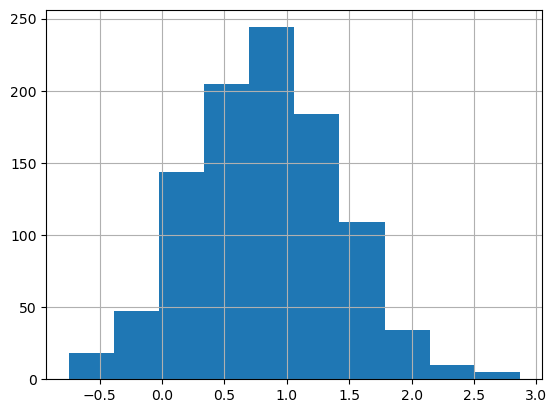

In [286]:
amostra = [data['Net profit'].sample(n=len(data),
           replace=True,
           ignore_index=True) for i in range(0, 1000)
          ]
amostra = pd.DataFrame(amostra).T
amostra.mean().hist()

## Alguns dados amostrais (máximo, mínimo e médio)

In [287]:
ganho_maximo = amostra.sum().max()
perda_maxima = amostra.sum().min()
ganho_medio = amostra.sum().mean()

dado_amostral = pd.DataFrame([ganho_maximo, perda_maxima, ganho_medio],
                       index=['Maior ganho amostral', 'Maior perda amostral', 'Ganho médio amostral'],
                       columns=['U$'])
dado_amostral['U$'] = dado_amostral['U$'].round(2)
dado_amostral

,U$
Maior ganho amostral,97.49
Maior perda amostral,-25.40
Ganho médio amostral,28.17


In [288]:
media = amostra['Net profit'].sum().mean()
desvio_padrao = amostra['Net profit'].sum().std()
z = norm.ppf(0.975)
e = z * desvio_padrao
n = (z * (desvio_padrao / e)) ** 2
n = int(n.round())
intervalo = norm.interval(alpha = 0.95,
                          loc = media,
                          scale = desvio_padrao / np.sqrt(n))

C:\Users\dduca\AppData\Local\Temp\ipykernel_1384\1292304377.py:7: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  intervalo = norm.interval(alpha = 0.95,


## Plotando o gráfico de Dispersão entre intervalo

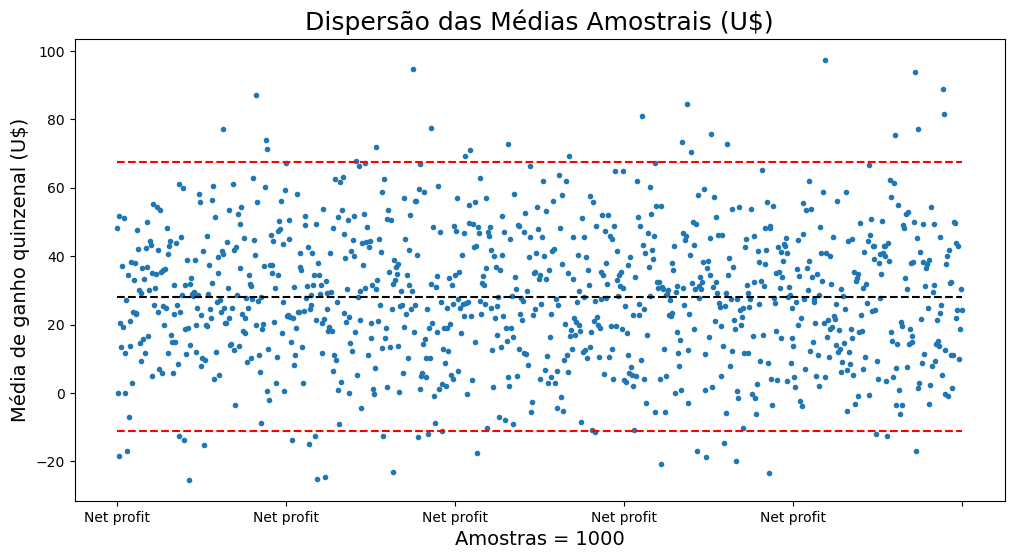

In [289]:
ax = amostra.sum().plot(style = '.')
ax.figure.set_size_inches(12, 6)
ax.set_title('Dispersão das Médias Amostrais (U$)', fontsize=18)
ax.set_ylabel('Média de ganho quinzenal (U$)', fontsize=14)
ax.set_xlabel('Amostras = 1000', fontsize=14)
ax.hlines(y = media, xmin = 0, xmax = 1000, colors='black', linestyles='dashed')
ax.hlines(y = intervalo[0], xmin = 0, xmax = 1000, colors='red', linestyles='dashed')
ax.hlines(y = intervalo[1], xmin = 0, xmax = 1000, colors='red', linestyles='dashed')
ax=ax